In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

In [2]:
# jedi 0.14.1 tab completion fails; will be fixed in 0.14.2
import jedi
if jedi.__version__ == '0.14.1':
    %config Completer.use_jedi = False
    
# Progress bar
from tqdm.auto import trange, tqdm

In [3]:
import pynrc
from pynrc import nircam_dark

# Initialize SCA Dark

In [4]:
datadir='/Users/jarron/NIRCam/Data/CV3_Darks/'
outdir='/Users/jarron/NIRCam/dark_analysis/CV3/'
dark_data = nircam_dark(485, datadir, outdir)

[     pynrc:INFO] Initializing SCA 485/A5


In [5]:
# Dark ramp/slope info

# Get Super dark ramp (cube)
dark_data.get_super_dark_ramp()

# Calculate dark slope image
dark_data.get_dark_slope_image()
dark_data.get_super_bias_update()

# Calculate pixel slope averages
dark_data.get_pixel_slope_averages()

[     pynrc:INFO] Generating initial super bias
[     pynrc:INFO] Creating super dark ramp cube, updated super bias, and pixel mask info
[     pynrc:INFO] Calculating dark slope image...
[     pynrc:INFO] Opening updated super bias
[     pynrc:INFO] Calculating average pixel ramps...


In [6]:
# Calculate CDS Noise for various component 
# white noise, 1/f noise (correlated and independent), temporal and spatial
dark_data.get_cds_dict()

# Effective Noise
dark_data.get_effective_noise()

# Get kTC reset noise, IPC, and PPC values
dark_data.get_ktc_noise()

# Get the power spectrum information
# Saved to pow_spec_dict['freq', 'ps_all', 'ps_corr', 'ps_ucorr']
dark_data.get_power_spectrum(include_oh=False, calc_cds=True, mn_func=np.median, per_pixel=False)

[     pynrc:INFO] Building CDS Noise dictionaries...
[     pynrc:INFO]   Best fit excess variance model parameters: [1.41538086 7.78820259]
[     pynrc:INFO] Calculating kTC Noise for active and reference pixels...
[     pynrc:INFO] Building noise power spectrum dictionary...


In [7]:
# Calculate IPC/PPC kernels
dark_data.get_ipc(calc_ppc=True)
# Deconvolve the super dark and super bias images
dark_data.deconvolve_supers()

[     pynrc:INFO] Calculating IPC and PPC kernels...
[     pynrc:INFO]   IPC = 0.597% +/- 0.004%
[     pynrc:INFO]   PPC = 0.123% +/- 0.010%
[     pynrc:INFO] Deconvolving super dark and super bias images...


In [8]:
# Get column variations
dark_data.get_column_variations()
# Create dictionary of reference pixel behavior
dark_data.get_ref_pixel_noise()

[     pynrc:INFO] Determining column variations (RTN)
[     pynrc:INFO] Determining reference pixel behavior


# Plot SCA Characteristics

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_dark_ramp_avg.pdf


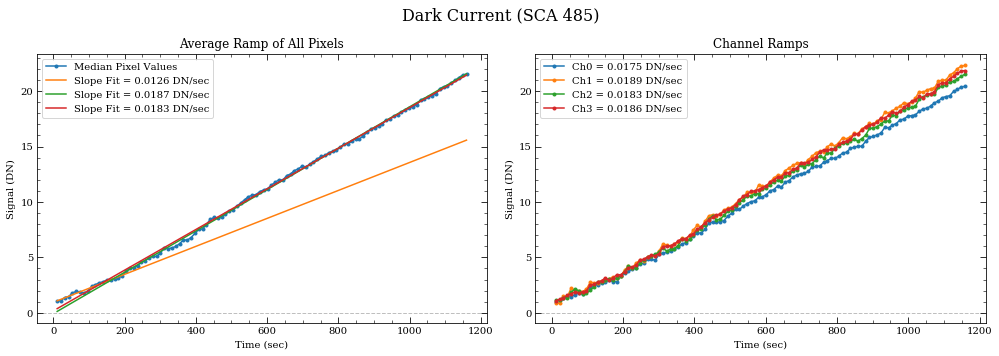

In [9]:
dark_data.plot_dark_ramps(save=True, time_cut=200)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_dark_ramp_chans.pdf


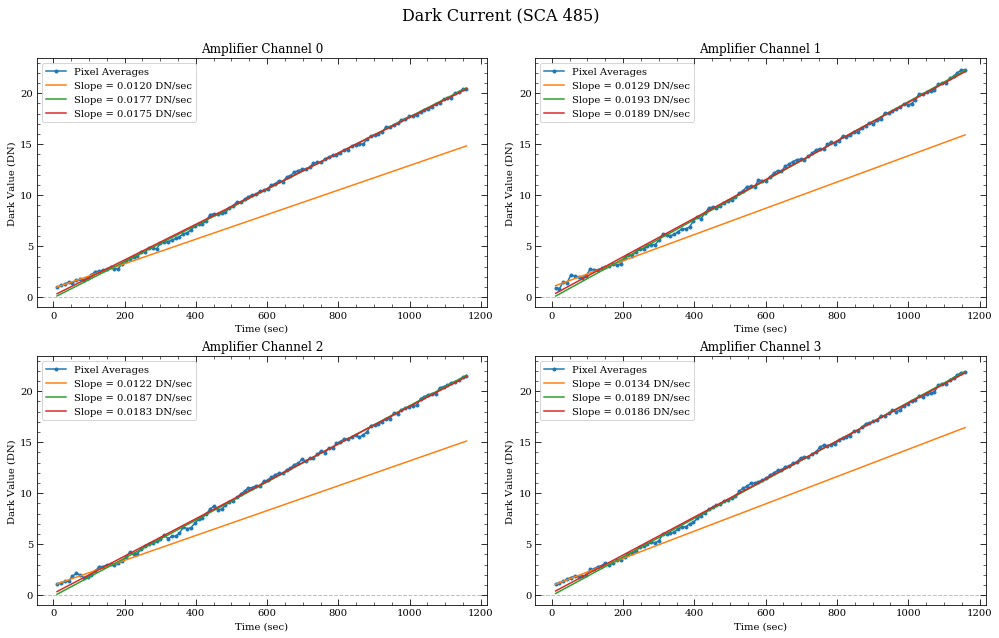

In [10]:
dark_data.plot_dark_ramps_ch(save=True, time_cut=200)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_bias_dark_images.pdf


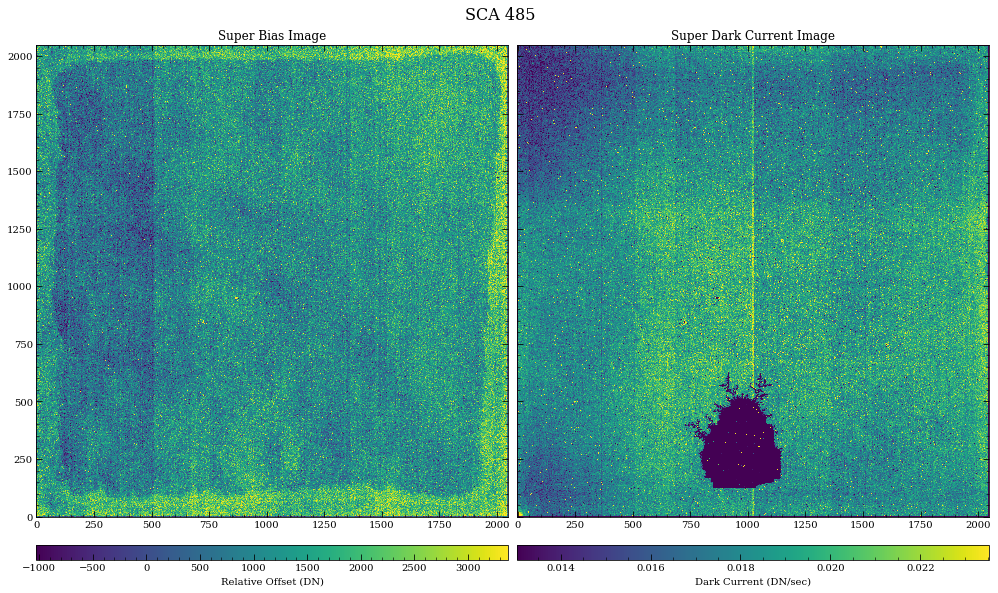

In [11]:
dark_data.plot_bias_darks(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_dark_histogram.pdf


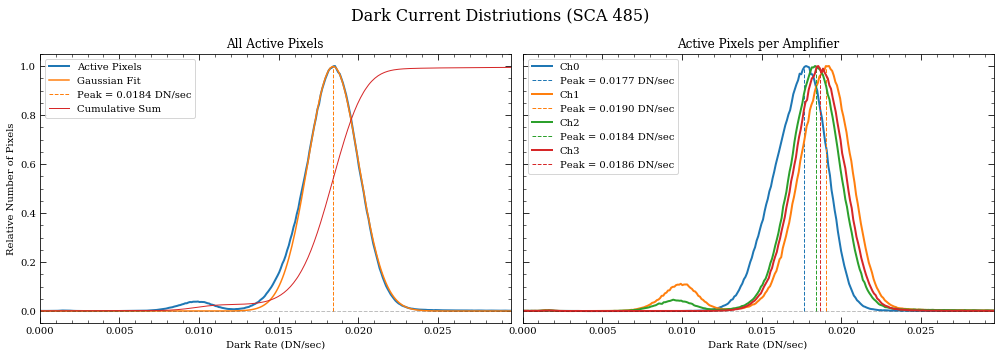

In [12]:
dark_data.plot_dark_distribution(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_dark_overview.pdf


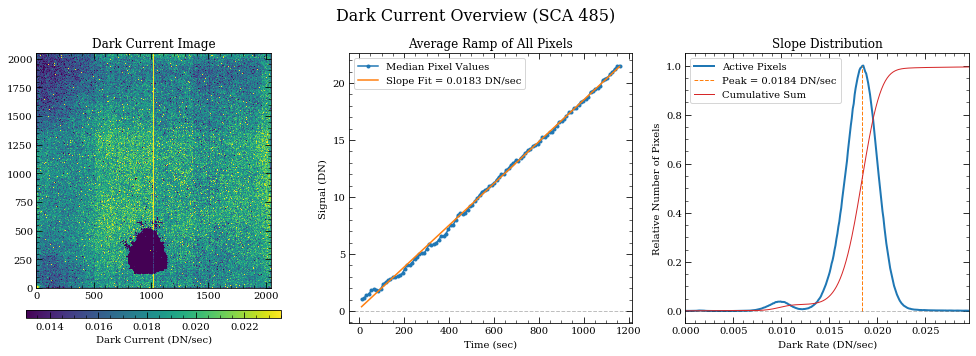

In [13]:
dark_data.plot_dark_overview(save=True)

[     pynrc:INFO] Calculating kTC Noise for active and reference pixels...
[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_bias_overview.pdf


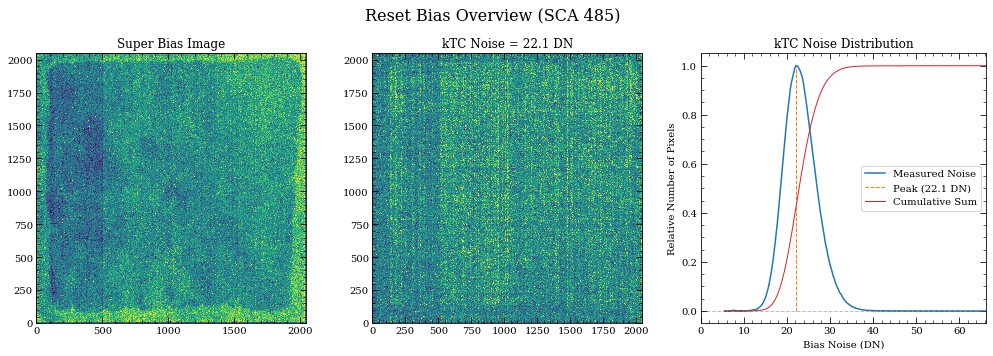

In [14]:
dark_data.plot_reset_overview(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_cds_noise.pdf


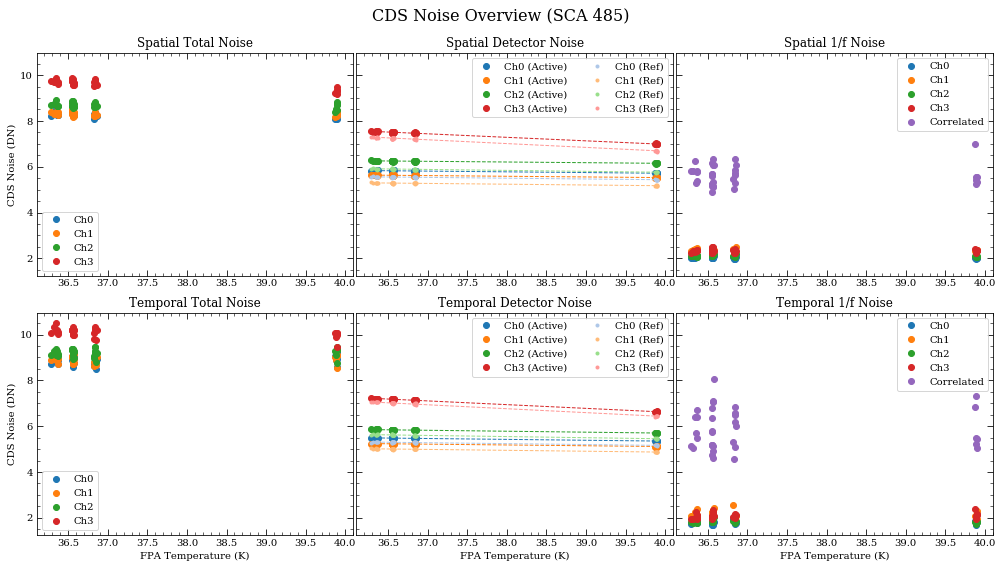

In [15]:
dark_data.plot_cds_noise(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_eff_noise_patterns.pdf


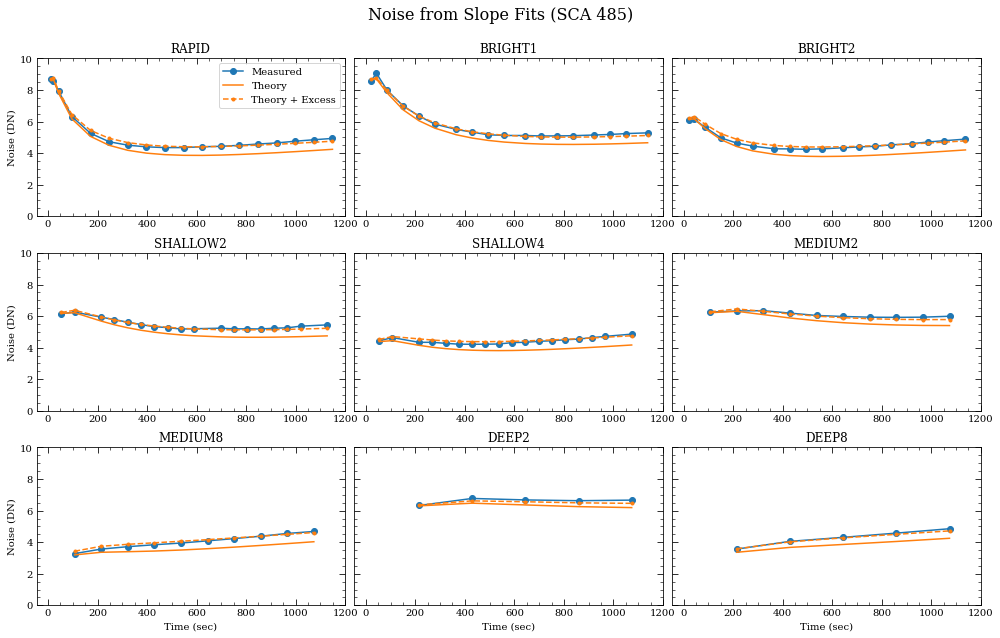

In [6]:
dark_data.plot_eff_noise_patterns(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_eff_noise.pdf


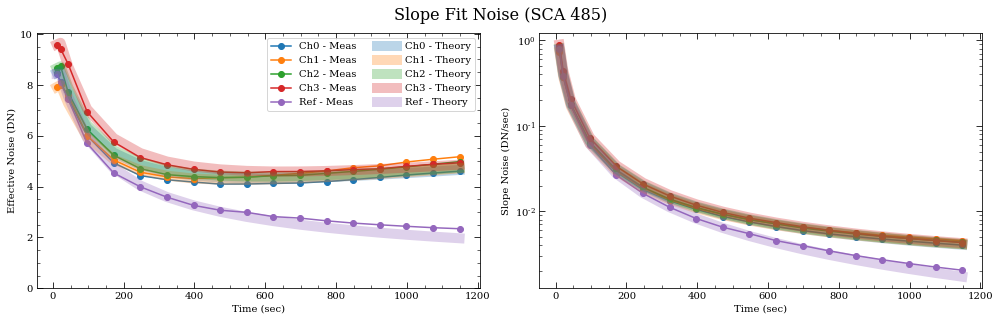

In [7]:
dark_data.plot_eff_noise(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_power_spectra.pdf


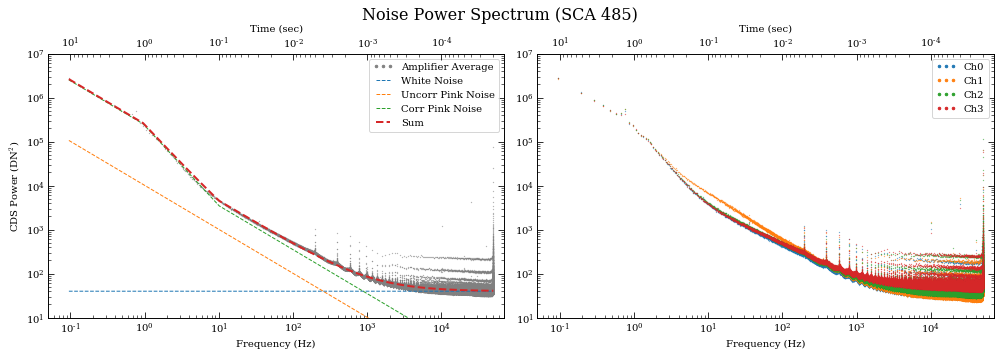

In [11]:
dark_data.plot_power_spectrum(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/485_pixel_kernels.pdf


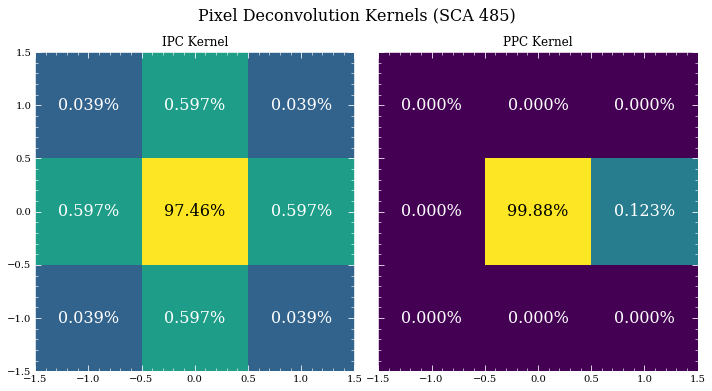

In [12]:
dark_data.plot_ipc_ppc(save=True)

In [8]:
from astropy.io import fits

from pynrc import nrc_utils, robust

from pynrc.detops import create_detops
from pynrc.reduce.ref_pixels import reffix_hxrg, channel_smooth_savgol, channel_averaging
from pynrc.nrc_utils import jl_poly_fit, jl_poly, hist_indices, pad_or_cut_to_size
from pynrc.simul.ngNRC import gen_col_noise, add_col_noise, gen_ramp_biases
from pynrc.simul.ngNRC import pink_noise, fft_noise, sim_noise_data, gen_dark_ramp, sim_dark_ramp
from pynrc.simul.ngNRC import add_ipc, add_ppc

from pynrc.reduce.calib import get_ipc_kernel, ipc_deconvolve, ppc_deconvolve
from pynrc.reduce.calib import get_fits_data, gen_super_bias, gen_super_dark
from pynrc.reduce.calib import chisqr_red, ramp_derivative, gen_col_variations
from pynrc.reduce.calib import gen_ref_dict#, get_bias_offsets, get_oddeven_offsets, get_ref_instability
from pynrc.reduce.calib import nircam_dark, plot_dark_histogram
from pynrc.reduce.calib import pow_spec_ramp, fit_corr_powspec, broken_pink_powspec
from pynrc.reduce.calib import get_power_spec, get_freq_array

In [9]:
from pynrc.reduce.calib import ramp_resample, calc_cdsnoise, calc_eff_noise

In [8]:
self = dark_data
del self._super_dark_ramp
self._super_dark_ramp = None